In [1]:
import keras
keras.__version__

Using TensorFlow backend.


'2.3.0'

In [2]:
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [3]:
train_data.shape

(25000,)

In [4]:
test_data.shape

(25000,)

In [5]:
train_labels.shape

(25000,)

In [6]:
test_labels.shape

(25000,)

In [7]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [8]:
train_labels[0]

1

In [9]:
max([max(sequence) for sequence in train_data])

9999

Here I am not including the code to convert these numeralsto actual code,as I hve already done in my other notebook

### Preparing the Data

In [10]:
import numpy as np

Here we are one hot encoding our lists to turn them into vectors of 0 and 1s, for example turning [3, 5] into a 10000 dimensional vector that will be all zero except 3 and 5 which will be 1 --- Instructional

it will be 10000 dimensional vector.

In [11]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    print("length of sequences : ", len(sequences))
    
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    
    print("Results : ", results)
    return results

In [12]:
x_train = vectorize_sequences(train_data)

length of sequences :  25000
Results :  [[0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 ...
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]]


In [13]:
x_test = vectorize_sequences(test_data)

length of sequences :  25000
Results :  [[0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 ...
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]]


In [18]:
x_train.shape

(25000, 10000)

In [15]:
# testing for python
y_train = np.asarray(train_labels).astype('float32')
y_test =  np.asarray(test_labels).astype('float32')

In [17]:
y_train.shape

(25000,)

In [20]:
from keras import models
from keras import layers

model= models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [21]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

W1101 22:59:48.718158 15064 deprecation.py:323] From C:\installs\Anaconda\envs\tf_gpu\lib\site-packages\tensorflow\python\ops\nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [23]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [24]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

W1101 23:06:05.092995 15064 deprecation_wrapper.py:119] From C:\installs\Anaconda\envs\tf_gpu\lib\site-packages\keras\backend\tensorflow_backend.py:422: The name tf.global_variables is deprecated. Please use tf.compat.v1.global_variables instead.



Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 8s 503us/step - loss: 0.5295 - accuracy: 0.7770 - val_loss: 0.3886 - val_accuracy: 0.8684
Epoch 2/20
15000/15000 [==============================] - 3s 203us/step - loss: 0.3065 - accuracy: 0.8993 - val_loss: 0.3061 - val_accuracy: 0.8857
Epoch 3/20
15000/15000 [==============================] - 3s 175us/step - loss: 0.2216 - accuracy: 0.9281 - val_loss: 0.2994 - val_accuracy: 0.8776
Epoch 4/20
15000/15000 [==============================] - 3s 185us/step - loss: 0.1775 - accuracy: 0.9438 - val_loss: 0.3485 - val_accuracy: 0.8572
Epoch 5/20
15000/15000 [==============================] - 3s 179us/step - loss: 0.1442 - accuracy: 0.9547 - val_loss: 0.2918 - val_accuracy: 0.8859
Epoch 6/20
15000/15000 [==============================] - 3s 184us/step - loss: 0.1143 - accuracy: 0.9647 - val_loss: 0.3169 - val_accuracy: 0.8813
Epoch 7/20
15000/15000 [==============================] - 2s 1

In [26]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])

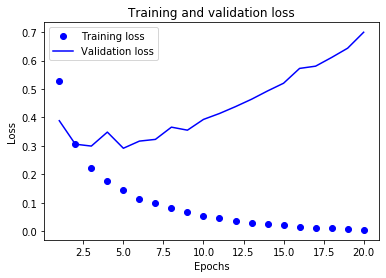

In [29]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+ 1)

plt.plot(epochs, loss,'bo',label='Training loss')

plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

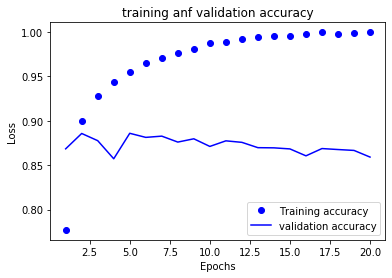

In [31]:
plt.clf()

acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='validation accuracy')
plt.title('training anf validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [34]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss = 'binary_crossentropy', metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
25000/25000 [==============================] - 4s 179us/step - loss: 0.4354 - accuracy: 0.8262
Epoch 2/4
25000/25000 [==============================] - 3s 112us/step - loss: 0.2484 - accuracy: 0.9127
Epoch 3/4
25000/25000 [==============================] - 3s 108us/step - loss: 0.1953 - accuracy: 0.9302
Epoch 4/4
25000/25000 [==============================] - 8s 330us/step


In [35]:
print(results)

[0.3001011113643646, 0.8810799717903137]


In [36]:
model.predict(x_test)

array([[0.16036427],
       [0.9998847 ],
       [0.8713306 ],
       ...,
       [0.12796134],
       [0.05419317],
       [0.5573873 ]], dtype=float32)

Here's what you should take away from this example:

    There's usually quite a bit of preprocessing you need to do on your raw data in order to be able to feed it -- as tensors -- into a neural network. In the case of sequences of words, they can be encoded as binary vectors -- but there are other encoding options too.
    Stacks of Dense layers with relu activations can solve a wide range of problems (including sentiment classification), and you will likely use them frequently.
    In a binary classification problem (two output classes), your network should end with a Dense layer with 1 unit and a sigmoid activation, i.e. the output of your network should be a scalar between 0 and 1, encoding a probability.
    With such a scalar sigmoid output, on a binary classification problem, the loss function you should use is binary_crossentropy.
    The rmsprop optimizer is generally a good enough choice of optimizer, whatever your problem. That's one less thing for you to worry about.
    As they get better on their training data, neural networks eventually start overfitting and end up obtaining increasingly worse results on data never-seen-before. Make sure to always monitor performance on data that is outside of the training set.
